In [3]:
%load_ext autoreload
%autoreload 2

from model_utils import load_model
from DisruptionPredictors import DisruptionPredictorSM, DisruptionPredictorRF, DisruptionPredictorKM
from Experiments import Experiment
from plot_experiments import *

device = 'cmod'
#dataset_path = 'no_ufo_flattop_1452_shots_50%_disruptive'
#dataset_path = 'random_flattop_256_shots_60%_disruptive'
dataset_path = 'no_ufo_flattop_7736_shots_6%_disruptive'
stack_dataset_path = 'no_ufo_flattop_7736_shots_6%_disruptive/stack_4'

# Load models and create experiments

# Should be able to do this more programmatically (in the future yeah, same thing to create an experiment for validation from YAML)
# def create_experiment(yaml_file)

#cph_model, cph_features = load_model('cph', device, dataset_path)
#cph_predictor = DisruptionPredictorSM("Cox Proportional Hazards", cph_model, cph_features, 0.02, 0.05)
#cph_experiment = Experiment(device, dataset_path, 'test', cph_predictor, 'CPH')

#cph_stack_model, cph_stack_features = load_model('cph', device, stack_dataset_path)
#cph_stack_predictor = DisruptionPredictorSM("Cox Proportional Hazards", cph_stack_model, cph_stack_features, 0.02, 0.05)
#cph_stack_experiment = Experiment(device, stack_dataset_path, 'test', cph_stack_predictor, 'CPH stack')

#dcph_model, dcph_features = load_model('dcph', device, dataset_path)
#dcph_predictor = DisruptionPredictorSM("Deep Cox Proportional Hazards", dcph_model, dcph_features)

#dcm_model, dcm_transformer, dcm_features = load_model('dcm', device, dataset_path)
#dcm_predictor = DisruptionPredictorSM("Deep Cox Mixture", dcm_model, dcm_features, dcm_transformer)

dsm_model, dsm_features = load_model('dsm', device, dataset_path)
dsm_predictor = DisruptionPredictorSM("Deep Survival Machines", dsm_model, dsm_features, 0.02, 0.05)
dsm_experiment = Experiment(device, dataset_path, 'test', dsm_predictor, 'DSM')

#dsm_stack_model, dsm_stack_features = load_model('dsm', device, stack_dataset_path)
#dsm_stack_predictor = DisruptionPredictorSM("Deep Survival Machines", dsm_stack_model, dsm_stack_features)
#dsm_stack_experiment = Experiment(device, stack_dataset_path, dsm_stack_predictor, 'DSM stack')

rf_model, rf_features = load_model('rf', device, dataset_path)
rf_predictor = DisruptionPredictorRF("Random Forest", rf_model, rf_features, 0.02, 0.05)
rf_experiment = Experiment(device, dataset_path, 'test', rf_predictor, 'RF')

#rf_stack_model, rf_stack_features = load_model('rf', device, stack_dataset_path)
#rf_stack_predictor = DisruptionPredictorRF("Random Forest", rf_stack_model, rf_stack_features)
#rf_stack_experiment = Experiment(device, stack_dataset_path, rf_stack_predictor, 'RF stack')

#km_model, km_features = rf_model, rf_features
#km_predictor = DisruptionPredictorKM("Kaplan-Meier", km_model, km_features)
#km_experiment = Experiment(device, dataset_path, km_predictor, 'KM')

short_list = [dsm_experiment, rf_experiment]

#stack_experiment_list = [cph_experiment, cph_stack_experiment, 
#                         dsm_experiment, dsm_stack_experiment,
#                         rf_experiment, rf_stack_experiment]

experiment_list = short_list


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded model from models/cmod/no_ufo_flattop_7736_shots_6%_disruptive/dsm.pkl
Loaded model from models/cmod/no_ufo_flattop_7736_shots_6%_disruptive/rf.pkl


## Micro Average ROC AUC vs Horizon

See how the models perform at the individual timeslice level across the entire database.

Two trends can be seen:
1. The survival models perform considerably better at longer horizons.
2. The survival models do not benefit as much as the binary classifiers from having temporal data of previous timeslices included in the feature list.

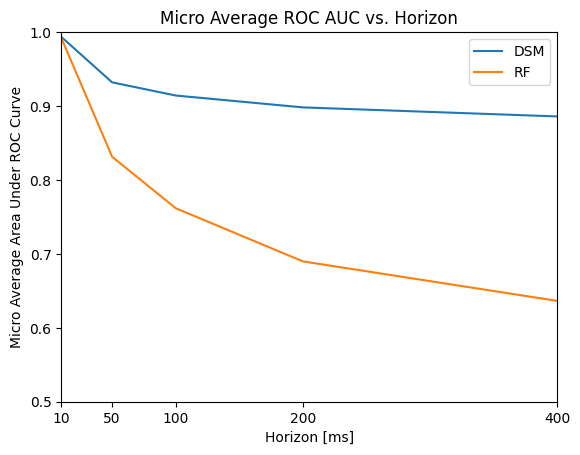

In [4]:
plot_roc_auc_vs_horizon_micro(experiment_list)

# Simple Threshold, 20ms and 100ms alarm performance.

## True Alarm Rate vs False Alarm Rate curve + enclosed area

## Warning Time vs False Alarm Rate curve

## At Best F1:
Avg + Std Warning Time:
True Alarm Rate:
False Alarm Rate:

c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\plot_experiments.py:108: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(1-plt.gca().get_yticks())
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\plot_experiments.py:114: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, 1])
c:\Users\zkeith\Documents\Risk-Aware Frameworks\disruption-survival-analysis\plot_experiments.py:115: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim([-5, 0])


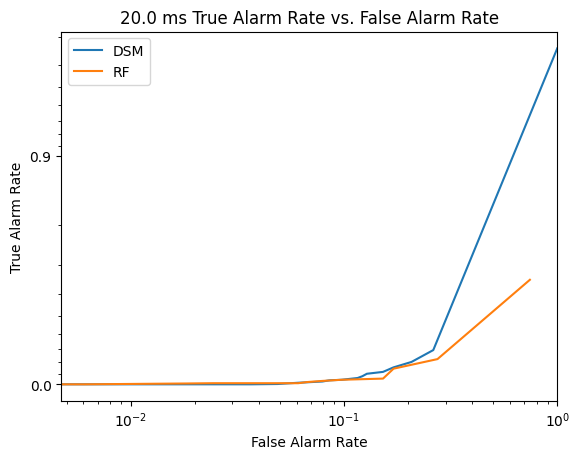

In [5]:
plot_TAR_vs_FAR(experiment_list)

# Hysteresis, 20ms and 100ms alarm performance

## True Alarm Rate vs False Alarm Rate

## Warning Time vs False Alarm Rate

## At Best F1:
Avg + Std Warning Time:
True Alarm Rate:
False Alarm Rate:

# Expected Time To Disruption (ETTD), 20ms and 100ms alarm performance

## True Alarm Rate vs False Alarm Rate

## Warning TIme vs False Alarm Rate

# One Model Type (several individual models), all above outputs plotted over Ip

In [2]:
plot_disruptive_vs_non_disruptive_shot_durations(experiment_list[0])

NameError: name 'experiment_list' is not defined